# 評価指標

## 回帰問題


### RMSE
真の値と予想値の差分に着目したい場合に選定

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error

# y_trueが真の値、y_predが予測値
y_true = [1.0, 1.5, 2.0, 1.2, 1.8]
y_pred = [0.8, 1.5, 1.8, 1.3, 3.0]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(rmse)
# 0.5532

0.5531726674375732


### RMSLE  
真の値と予測値の比率に着目したい場合に選定

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

# y_trueが真の値、y_predが予測値
y_true = [1.0, 1.5, 2.0, 1.2, 1.8]
y_pred = [0.8, 1.5, 1.8, 1.3, 3.0]

rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
print(rmsle)
# 0.5532

0.17032547044118185


### MAE  
xgboostに活用できない（目的関数に指定できない）
なのでカスタム目的関数での工夫が必要


In [9]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# y_trueが真の値、y_predが予測値
y_true = [1.0, 1.5, 2.0, 1.2, 1.8]
y_pred = [0.8, 1.5, 1.8, 1.3, 3.0]

mae = mean_absolute_error(y_true, y_pred)
print(mae)

0.33999999999999997


### Pseudo-Huber, Fair関数（MAEの代替）  
MAEが評価指標の際にカスタム目的関数として使用できる

In [ ]:
# Fair 関数
def fair(preds, dtrain):
    x = preds - dtrain.get_labels()  # 残差を取得
    c = 1.0  # Fair関数のパラメータ
    den = abs(x) + c  # 勾配の式の分母を計算
    grad = c * x / den  # 勾配
    hess = c * c / den ** 2  # 二階微分値
    return grad, hess


# Pseudo-Huber関数
def psuedo_huber(preds, dtrain):
    d = preds - dtrain.get_labels()  # 残差を取得
    delta = 1.0  # Pseudo-Huber関数のパラメータ
    scale = 1 + (d / delta) ** 2
    scale_sqrt = np.sqrt(scale)
    grad = d / scale_sqrt  # 勾配
    hess = 1 / scale / scale_sqrt  # 二階微分値
    return grad, hess

### 決定係数  R^2
回帰分析の当てはまりの良さを表す  
本指標の最大化=RMSEの最小化と同じ意味になる  
範囲: 1- -1

In [10]:
import numpy as np
from sklearn.metrics import r2_score

# y_trueが真の値、y_predが予測値
y_true = [1.0, 1.5, 2.0, 1.2, 1.8]
y_pred = [0.8, 1.5, 1.8, 1.3, 3.0]

r2 = r2_score(y_true, y_pred)
print(r2)

-1.2499999999999996


## 分類問題


### 混同行列

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# 0, 1で表される二値分類の真の値と予測値
y_true = [1, 0, 1, 1, 0, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0, 0, 1, 1]

# 条件がマッチした数をカウントしている
tp = np.sum((np.array(y_true) == 1) & (np.array(y_pred) == 1))
tn = np.sum((np.array(y_true) == 0) & (np.array(y_pred) == 0))
fp = np.sum((np.array(y_true) == 0) & (np.array(y_pred) == 1))
fn = np.sum((np.array(y_true) == 1) & (np.array(y_pred) == 0))

confusion_matrix1 = np.array([[tp, fp],
                              [fn, tn]])
print(confusion_matrix1)
# array([[3, 1],
#        [2, 2]])

# scikit-learnのmetricsモジュールのconfusion_matrixでも作成できるが、
# 混同行列の要素の配置が違うので注意が必要
confusion_matrix2 = confusion_matrix(y_true, y_pred)
print(confusion_matrix2)

# array([[2, 1],
#        [2, 3]])

[[3 1]
 [2 2]]
[[2 1]
 [2 3]]


### logloss

In [ ]:
from sklearn.metrics import log_loss

# 0, 1で表される二値分類の真の値と予測確率
y_true = [1, 0, 1, 1, 0, 1]
y_prob = [0.1, 0.2, 0.8, 0.8, 0.1, 0.3]

logloss = log_loss(y_true, y_prob)
print(logloss)
# 0.7136

0.7135581778200728


### AUC
Gini係数 = 2・AUC - 1  
[2\-5\. ジニ係数 \| 統計学の時間 \| 統計WEB](https://bellcurve.jp/statistics/course/3798.html)  
  偏り、不均等さを数値で表したもの

In [ ]:
from sklearn.metrics import roc_auc_score
y_true = [1, 0, 1, 1, 0, 1]
y_prob = [0.1, 0.2, 0.8, 0.8, 0.1, 0.3]

auc = roc_auc_score(y_true, y_prob)
print(auc)

0.8125


### multi-class logloss

In [ ]:
import numpy as np
from sklearn.metrics import log_loss

# 3クラス分類の真の値と予測値
y_true = np.array([0, 2, 1, 2, 2])
y_pred = np.array([[0.68, 0.32, 0.00],
                  [0.00, 0.00, 1.00],
                  [0.60, 0.40, 0.00],
                  [0.00, 0.00, 1.00],
                  [0.28, 0.12, 0.60]])
logloss = log_loss(y_true, y_pred)
print(logloss)
# 0.3626

0.3625557672904274


### MAP@K
レコメンデーションタスク用  
可能性が高い順に予想値を出す Kの値が予想値の数

In [ ]:
# K=3、レコード数は5個、クラスは4種類とする
K = 3

# 各レコードの真の値
y_true = [[1, 2], [1, 2], [4], [1, 2, 3, 4], [3, 4]]

# 各レコードに対する予測値 - K=3なので、通常は各レコードにそれぞれ3個まで順位をつけて予測する
y_pred = [[1, 2, 4], [4, 1, 2], [1, 4, 3], [1, 2, 3], [1, 2, 4]]


# 各レコードごとのaverage precisionを計算する関数
def apk(y_i_true, y_i_pred):
    # y_predがK以下の長さで、要素がすべて異なることが必要
    assert (len(y_i_pred) <= K)
    assert (len(np.unique(y_i_pred)) == len(y_i_pred))

    sum_precision = 0.0
    num_hits = 0.0

    for i, p in enumerate(y_i_pred):
        if p in y_i_true:
            num_hits += 1
            precision = num_hits / (i + 1)
            sum_precision += precision
    
    # Kよりもy_i_true値が少ない場合、その値で平均を取る必要があるため
    return sum_precision / min(len(y_i_true), K)


# MAP@K を計算する関数
def mapk(y_true, y_pred):
    return np.mean([apk(y_i_true, y_i_pred) for y_i_true, y_i_pred in zip(y_true, y_pred)])


# MAP@Kを求める
print(mapk(y_true, y_pred))
# 0.65

# 正解の数が同じでも、順序が違うとスコアも異なる
print(apk(y_true[0], y_pred[0]))
print(apk(y_true[1], y_pred[1]))
# 1.0, 0.5833

2
2
1
3
2
0.6499999999999999
2
1.0
2
0.5833333333333333


# 閾値の最適化

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from scipy.optimize import minimize

# サンプルデータ生成の準備
rand = np.random.RandomState(seed=71)
train_y_prob = np.linspace(0, 1.0, 10000)

# 真の値と予測値が以下のtrain_y, train_pred_probであったとする
train_y = pd.Series(rand.uniform(0.0, 1.0, train_y_prob.size) < train_y_prob)
train_y_num = rand.uniform(0.0, 1.0, train_y_prob.size)

print(rand)
print(train_y_prob)
print(train_y)
print(train_y_num)

RandomState(MT19937)
[0.00000000e+00 1.00010001e-04 2.00020002e-04 ... 9.99799980e-01
 9.99899990e-01 1.00000000e+00]
0       False
1       False
2       False
3       False
4       False
        ...  
9995     True
9996     True
9997     True
9998     True
9999     True
Length: 10000, dtype: bool
[0.84594609 0.07246881 0.68153188 ... 0.20707361 0.43090398 0.86420123]


In [ ]:
train_pred_prob = np.clip(train_y_prob * np.exp(rand.standard_normal(train_y_prob.shape) * 0.3), 0.0, 1.0)
print(train_pred_prob)

[0.00000000e+00 9.59643137e-05 1.57325613e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


### 分布確認

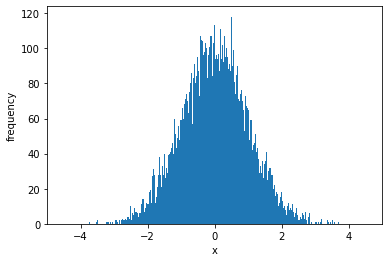

In [ ]:
import matplotlib.pyplot as plt
rand = np.random.standard_normal(10000)
plt.hist(rand, bins=300)
plt.xlabel('x')
plt.ylabel('frequency')
plt.xlim(-5, 5)
plt.show()

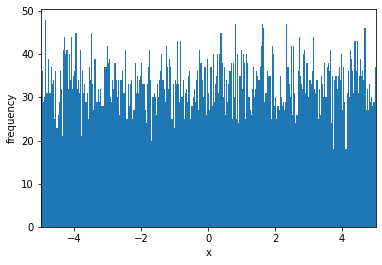

In [ ]:
import matplotlib.pyplot as plt
rand = np.random.uniform(-5.0, 5.0, 10000)
plt.hist(rand, bins=300)
plt.xlabel('x')
plt.ylabel('frequency')
plt.xlim(-5, 5)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from scipy.optimize import minimize

# サンプルデータ生成の準備
rand = np.random.RandomState(seed=71)
train_y_prob = np.linspace(0, 1.0, 10000)

# 真の値と予測値が以下のtrain_y, train_pred_probであったとする
train_y = pd.Series(rand.uniform(0.0, 1.0, train_y_prob.size) < train_y_prob)
train_pred_prob = np.clip(train_y_prob * np.exp(rand.standard_normal(train_y_prob.shape) * 0.3), 0.0, 1.0)

# 閾値を0.5とすると、F1は0.722
init_threshold = 0.5
init_score = f1_score(train_y, train_pred_prob >= init_threshold)
print(init_threshold, init_score)


# 最適化の目的関数を設定
def f1_opt(x):
    return -f1_score(train_y, train_pred_prob >= x)


# scipy.optimizeのminimizeメソッドで最適な閾値を求める
# 求めた最適な閾値をもとにF1を求めると、0.756 となる
result = minimize(f1_opt, x0=np.array([0.5]), method="Nelder-Mead")
best_threshold = result['x'].item()
best_score = f1_score(train_y, train_pred_prob >= best_threshold)
print(best_threshold, best_score)

0.5 0.7224831529507862
0.32324218749999983 0.7557317703844165


## 閾値の最適化 oof

In [ ]:
from scipy.optimize import minimize
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

# サンプルデータ生成の準備
rand = np.random.RandomState(seed=71)
train_y_prob = np.linspace(0, 1.0, 10000)

# 真の値と予測値が以下のtrain_y, train_pred_probであったとする
train_y = pd.Series(rand.uniform(0.0, 1.0, train_y_prob.size) < train_y_prob)
train_pred_prob = np.clip(train_y_prob * np.exp(rand.standard_normal(train_y_prob.shape) * 0.3), 0.0, 1.0)

# クロスバリデーションの枠組みで閾値を求める
thresholds = []
scores_tr = []
scores_va = []

kf = KFold(n_splits=4, random_state=71, shuffle=True)
for i, (tr_idx, va_idx) in enumerate(kf.split(train_pred_prob)):
    tr_pred_prob, va_pred_prob = train_pred_prob[tr_idx], train_pred_prob[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    # 最適化の目的関数を設定
    def f1_opt(x):
        return -f1_score(tr_y, tr_pred_prob >= x)

    # 学習データで閾値の最適化を行い、バリデーションデータで評価を行う
    result = minimize(f1_opt, x0=np.array([0.5]), method="Nelder-Mead")
    threshold = result['x'].item()
    score_tr = f1_score(tr_y, tr_pred_prob >= threshold)
    score_va = f1_score(va_y, va_pred_prob >= threshold)
    print(threshold, score_tr, score_va)

    thresholds.append(threshold)
    scores_tr.append(score_tr)
    scores_va.append(score_va)

# 各foldの閾値の平均をテストデータには適用する
threshold_test = np.mean(thresholds)
print(threshold_test)

0.34257812499999984 0.7559183673469387 0.7570422535211268
0.34277343749999983 0.7598457403295548 0.7450980392156863
0.31787109374999983 0.7548253676470588 0.7584803256445047
0.3234374999999998 0.7545569184913447 0.7588603196664351
0.33166503906249983
